This notebook assumes you are using sims_maf version >= 1.1, and have 'setup sims_maf' in your shell. 

This notebook shows how MAF can use the LSST camera geometry to decide if a region has been observed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
from lsst.sims.maf.plots import PlotHandler

In [2]:
# Set the database and query
database = 'enigma_1189_sqlite.db'
sqlWhere = 'filter = "r" and night < 400 and fieldRA < %f and fieldDec > %f and fieldDec < 0' % (np.radians(15), np.radians(-15))
opsdb = db.OpsimDatabase(database)
outDir = 'Camera'
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
nside=512
metric = metrics.CountMetric('expMJD')
slicer = slicers.HealpixSlicer(nside=nside)
slicer2 = slicers.HealpixSlicer(nside=nside, useCamera=True)

Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes
Healpix slicer using NSIDE=512, approximate resolution 6.870973 arcminutes


In [30]:
bundle1 = metricBundles.MetricBundle(metric,slicer,sqlWhere)
bundle2 = metricBundles.MetricBundle(metric,slicer2,sqlWhere)
bg = metricBundles.MetricBundleGroup({0:bundle1, 1:bundle2},opsdb, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

Querying database with constraint filter = "r" and night < 400 and fieldRA < 0.261799 and fieldDec > -0.261799 and fieldDec < 0
Found 270 visits
Running:  [0]
Completed metric generation.
Running:  [1]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


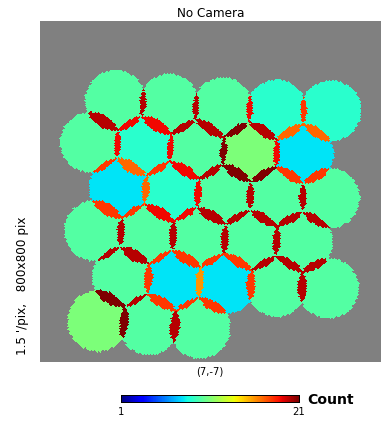

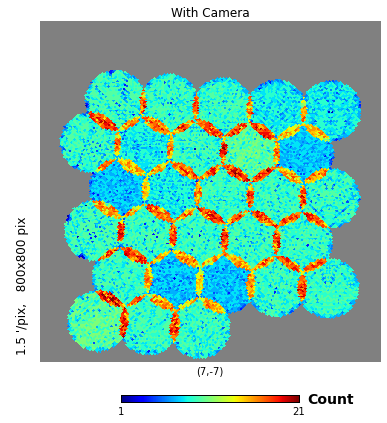

In [32]:
import healpy as hp
hp.gnomview(bundle1.metricValues, xsize=800,ysize=800, rot=(7,-7,0), title='No Camera', unit='Count', min=1,max=21)
hp.gnomview(bundle2.metricValues, xsize=800,ysize=800, rot=(7,-7,0),title='With Camera', unit='Count', min=1,max=21)

In [38]:
sqlWhere = 'fieldID = 2266 and night < 500'
nside = 2048
metric = metrics.CountMetric('expMJD')
slicer = slicers.HealpixSlicer(nside=nside, useCamera=True)
bundle1 = metricBundles.MetricBundle(metric,slicer,sqlWhere)

bg = metricBundles.MetricBundleGroup({0:bundle1},opsdb, outDir=outDir, resultsDb=resultsDb)
bg.runAll()

Healpix slicer using NSIDE=2048, approximate resolution 1.717743 arcminutes
Querying database with constraint fieldID = 2266 and night < 500
Found 79 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


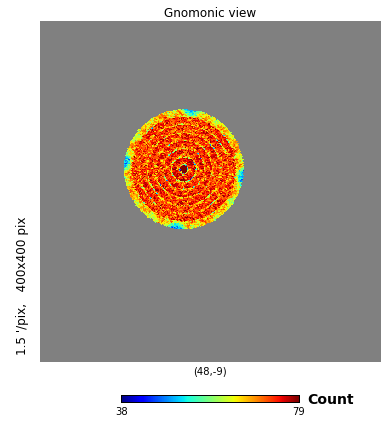

In [39]:
hp.gnomview(bundle1.metricValues, xsize=400,ysize=400, rot=(48,-9,0), unit='Count')